In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from traffic_utility import get_traffic

df = pd.read_json("results.json", dtype = False)
path, flow = get_traffic()



In [44]:
flows = []
paths = []

for index, row in df.iterrows():
    flow_id = [int(x) for x in row["flow_id"].split("_")]
    sample = row["sample_file_id"]
    nodes = int(math.sqrt(len(path[sample]["data"])))
    flows.append(float(flow[sample][flow_id[0]*nodes+flow_id[1]][flow_id[2]][3]))
    paths.append(float(path[sample]['data'][flow_id[0]*nodes+flow_id[1]][3]))

df["paths"] = paths
df["flows"] = flows

df["MAPE_path"] = 100 * abs((df.paths - df.predicted_delay)/df.paths)
df["MAPE_flow"] = 100 * abs((df.flows - df.predicted_delay)/df.flows)

print("MAPE for path prediction:", np.sum(df["MAPE_path"])/len(df.index))
print("MAPE for flow prediction:", np.sum(df["MAPE_flow"])/len(df.index))

print(df.head())



MAPE for path prediction: 35.989498927937944
MAPE for flow prediction: 33.938472202825494
   sample_file_id flow_id  predicted_delay     paths     flows  MAPE_path  \
0            2100   0_1_0         0.079803  0.127547  0.123674  37.432146   
1            2100   0_1_1         0.082000  0.127547  0.127609  35.709638   
2            2100   0_2_0         0.098949  0.114563  0.108493  13.628817   
3            2100   0_2_1         0.110606  0.114563  0.114661   3.453970   
4            2100   0_3_0         0.006074  0.006687  0.006066   9.167703   

   MAPE_flow  
0  35.473080  
1  35.740985  
2   8.796666  
3   3.536395  
4   0.136531  


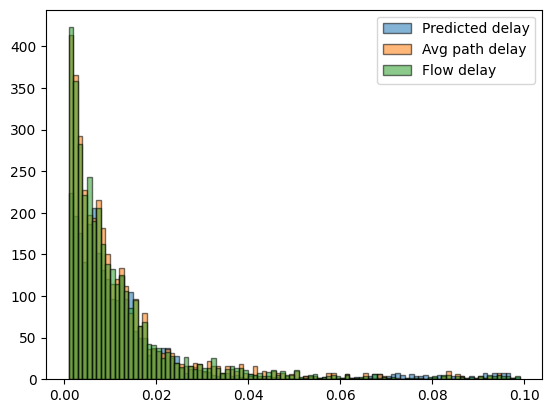

In [45]:
plt.hist(df.predicted_delay, np.arange(0.001,0.1,0.001), edgecolor = "black", alpha = 0.55, label = "Predicted delay")
plt.hist(df.paths, np.arange(0.001,0.1,0.001), edgecolor = "black", alpha = 0.55, label = "Avg path delay")
plt.hist(df.flows, np.arange(0.001,0.1,0.001), edgecolor = "black", alpha = 0.55, label = "Flow delay")
plt.legend()
plt.savefig("LabelComp.png", dpi = 400)
plt.show()

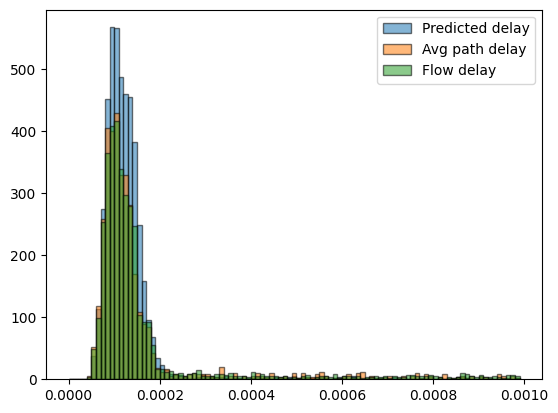

In [46]:
plt.hist(df.predicted_delay, np.arange(0,0.001,0.00001), edgecolor = "black", alpha = 0.55, label = "Predicted delay")
plt.hist(df.paths, np.arange(0,0.001,0.00001), edgecolor = "black", alpha = 0.55, label = "Avg path delay")
plt.hist(df.flows, np.arange(0,0.001,0.00001), edgecolor = "black", alpha = 0.55, label = "Flow delay")
plt.legend()
plt.savefig("LabelCompZoom.png", dpi = 400)
plt.show()